# 1.->Predicting Employee Exit

  We will be working on Employee Data. This is employee attrition data. The 'left' named column represents exit from the company or not.

  The data consists of categorical & number data. Thus, needs data preprocessing. Make use of preprocessing techniques that you have learnt & build model to predict 'left' named column


  

# ->Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("C:\\Users\\sneha\\Downloads\\HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
df.shape

(14999, 10)

In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


->Preprocessing  and Encode categorical columns using LabelEncoder


In [10]:
le = LabelEncoder()
df['sales'] = le.fit_transform(df['sales'])
df['salary'] = le.fit_transform(df['salary'])

->Scale numerical columns using StandardScaler

In [11]:
scale = StandardScaler()
df[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']] = scale.fit_transform(df[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']])


->Split the data into train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('left', axis=1), df['left'], test_size=0.2, random_state=42)

->Building the model


In [13]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

->Make predictions on test set


In [14]:
y_pred = rfc.predict(X_test)

->Evaluate the model performance

In [20]:
accuracy = accuracy_score(y_test, y_pred)

In [29]:
print('Accuracy :\n','-'*20, sep="")
accuracy

Accuracy :
--------------------


0.988

#  2. Estimate the total compensation to be provided to an employee.
  
  

-> Import necessary libraries


In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

->Loading dataset

In [55]:
n_df = pd.read_csv("C:\\Users\\sneha\Downloads\\train_set.csv")
n_df.head(5)

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [56]:
n_df.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [57]:
n_df.shape

(287836, 15)

In [58]:
n_df.isna().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [59]:
n_df.drop(['OGC', 'DC', 'UC', 'JF', 'EI', 'YT'], axis=1, inplace= True)

In [60]:
n_df.head(5)

,Year,OG,Dept,Union,Job,Salaries,Overtime,H/D,Total_Compensation
0,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Morgue Attendant,12196,0,0.00,16158
1,2013,Community Health,Public Health,"Stationary Engineers, Local 39",Stationary Engineer,74639,2820,12703.31,115784
2,2015,General Administration & Finance,Assessor/Recorder,"Prof & Tech Engineers - Miscellaneous, Local 21",Senior Real Property Appraiser,100554,0,12424.50,144708
3,2016,Public Protection,Police,Police Officers' Association,Sergeant 3,140164,52754,13043.87,242323
4,2013,"Public Works, Transportation & Commerce",PUC Hetch Hetchy,"Prof & Tech Engineers - Miscellaneous, Local 21",IS Engineer-Journey,58813,0,7655.28,82106


In [62]:
n_df = pd.get_dummies(n_df, columns=['OG', 'Dept', 'Union', 'Job'])

In [63]:
n_df.head()

,Year,Salaries,Overtime,H/D,Total_Compensation,OG_Community Health,OG_Culture & Recreation,OG_General Administration & Finance,OG_General City Responsibilities,OG_Human Welfare & Neighborhood Development,...,Job_Wharfinger 2,Job_Window Cleaner,Job_Window Cleaner Supervisor,Job_Wire Rope Cable Maint Mechanic,Job_Wire Rope Cable Maint Sprv,Job_Wireropecable Maint Mech Train,Job_Worker's Comp Supervisor 1,Job_Worker's Compensation Adjuster,Job_X-Ray Laboratory Aide,Job_Youth Comm Advisor
0,2015,12196,0,0.00,16158,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,74639,2820,12703.31,115784,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,100554,0,12424.50,144708,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,140164,52754,13043.87,242323,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,58813,0,7655.28,82106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Compensation', axis=1), df['Total_Compensation'], test_size=0.2, random_state=42)

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_test)

In [67]:
X_test['Total_Compensation_Predicted'] = y_pred

In [68]:
print(X_test[['Salaries', 'Overtime', 'H/D', 'Total_Compensation_Predicted']].head(10))

        Salaries  Overtime          H/D  Total_Compensation_Predicted
37188      64670     14082  13483.42000                 118267.807932
43547      38108         0  10230.58000                  60808.148757
128478     54756         0  12918.24848                  86022.045145
106956       748         0    269.89000                   -335.654707
157292     73379         0  12500.56000                 108432.364359
61370      69857         0  12410.67000                 102414.933635
285307         0         0     12.86000                   4755.050714
131637     60781         0  12801.79000                  92185.768400
204983     28955         0   6787.18000                  44796.567884
158603    231480         0  12424.50000                 318447.911847


# 3 Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.



   With 79 explanatory variables describing (almost) every aspect of residential homes, build a machine learning model to predict the price of a house



  

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
train_df = pd.read_csv("C:\\Users\\sneha\\Downloads\\train.csv")
test_df = pd.read_csv("C:\\Users\\sneha\\Downloads\\test.csv")

In [71]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [73]:
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [75]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [76]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

In [77]:
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [78]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

In [79]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

In [80]:
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f"{name}: MSE={mse:.2f}, MAE={mae:.2f}, R^2={r2:.2f}")

Linear Regression: MSE=867133887.70, MAE=18359.50, R^2=0.89
Decision Tree: MSE=1748312085.31, MAE=26643.43, R^2=0.77
Random Forest: MSE=856245438.81, MAE=17693.30, R^2=0.89
Gradient Boosting: MSE=736158439.97, MAE=16832.43, R^2=0.90


In [81]:
best_model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(random_state=42))])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(test_df)
# Make predictions on the test set
y_pred = best_model.predict(test_df)

In [82]:
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
output.to_csv('submission.csv', index=False)

# 4. Obesity is a worldwide problem which causes a lot of serious medical problems. Obesity will be increased, about 45% out of the whole population by 2035. The proportion of morbid obese and the actual costs on healthcare will be increased. Implementation of a system that could estimate the percentage of obese population for particular time duration given the age range, income range, location, high confidence level and low confidence level of obesity, education, gender, the class level, etc. of the population can help in fight against obesity.

Build a machine learning model to estimate the percentage of obese population.



In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [86]:
odf = pd.read_csv("D:\\One Drive Storage\\OneDrive\\Desktop\\DataSets\\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
odf.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [87]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [88]:
odf.shape

(53392, 33)

In [89]:
odf.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [90]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [91]:
odf.drop(['YearEnd', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
        'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Total', 'Gender', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'], axis = 1, inplace=True)

In [94]:
odf.head(5)

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Age(years),Education,Income,Race/Ethnicity,LocationID
0,2011,AL,Alabama,32.0,7304.0,NaN,NaN,NaN,NaN,1
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,NaN,1
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,NaN,1
3,2011,AL,Alabama,33.6,1153.0,NaN,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,NaN,High school graduate,NaN,NaN,1


In [95]:
odf.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value',
       'Sample_Size', 'Age(years)', 'Education', 'Income', 'Race/Ethnicity',
       'LocationID'],
      dtype='object')

In [96]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       53392 non-null  int64  
 1   LocationAbbr    53392 non-null  object 
 2   LocationDesc    53392 non-null  object 
 3   Data_Value      48346 non-null  float64
 4   Sample_Size     48346 non-null  float64
 5   Age(years)      11438 non-null  object 
 6   Education       7628 non-null   object 
 7   Income          13349 non-null  object 
 8   Race/Ethnicity  15256 non-null  object 
 9   LocationID      53392 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.1+ MB


In [97]:
odf.isna().sum()

YearStart             0
LocationAbbr          0
LocationDesc          0
Data_Value         5046
Sample_Size        5046
Age(years)        41954
Education         45764
Income            40043
Race/Ethnicity    38136
LocationID            0
dtype: int64

In [102]:
odf.duplicated().sum()
odf.drop_duplicates()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Age(years),Education,Income,Race/Ethnicity,LocationID
0,2011,AL,Alabama,32.0,7304.0,NaN,NaN,NaN,NaN,1
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,NaN,1
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,NaN,1
3,2011,AL,Alabama,33.6,1153.0,NaN,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,NaN,High school graduate,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
53382,2016,VI,Virgin Islands,13.3,212.0,NaN,NaN,"$75,000 or greater",NaN,78
53383,2016,VI,Virgin Islands,25.3,137.0,NaN,NaN,Data not reported,NaN,78
53384,2016,VI,Virgin Islands,18.3,154.0,NaN,NaN,NaN,Non-Hispanic White,78
53385,2016,VI,Virgin Islands,24.1,820.0,NaN,NaN,NaN,Non-Hispanic Black,78


In [108]:
odf.drop(["Age(years)"], axis=1, inplace= True)

In [110]:
odf.drop(["Education"], axis=1, inplace= True)

C:\Users\tharu\AppData\Local\Temp\ipykernel_11084\281234637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(odf.corr(), cmap= 'Blues')


<AxesSubplot: >

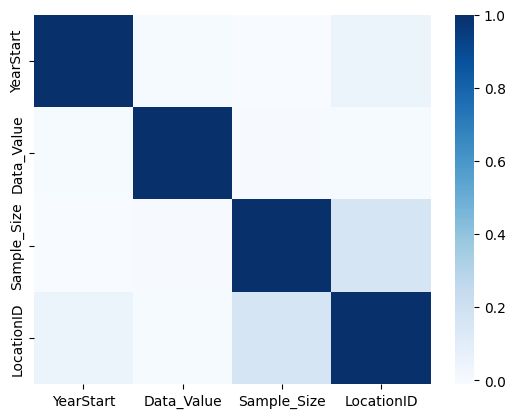

In [119]:
import seaborn as sns
sns.heatmap(odf.corr(), cmap= 'Blues')

In [120]:
odf.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value',
       'Sample_Size', 'Income', 'Race/Ethnicity', 'LocationID'],
      dtype='object')

In [121]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       53392 non-null  int64  
 1   LocationAbbr    53392 non-null  object 
 2   LocationDesc    53392 non-null  object 
 3   Data_Value      48346 non-null  float64
 4   Sample_Size     48346 non-null  float64
 5   Income          13349 non-null  object 
 6   Race/Ethnicity  15256 non-null  object 
 7   LocationID      53392 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.3+ MB


In [151]:
odf['Sample_Size'] = odf['Sample_Size'].fillna(odf['Sample_Size'].mean())

In [153]:
x = odf[['YearStart', 'LocationID','Sample_Size']]
y = odf['Data_Value']

In [154]:
y = y.fillna(y.mean())

In [155]:
x.isna().sum()

YearStart      0
LocationID     0
Sample_Size    0
dtype: int64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,YearStart,LocationID,Sample_Size
27567,2013,44,787.0
35683,2015,12,2088.0
1414,2011,4,6105.0


In [157]:
y_train.head()

27567    48.9
35683    42.2
1414     38.0
22401    46.4
52430    32.6
Name: Data_Value, dtype: float64

In [158]:
std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)

In [159]:
X_test_scaled=std_scaler.transform(X_test)

In [161]:
import statsmodels.api as sm
X_train_const_scaled = sm.add_constant(X_train_scaled) 
model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled)
X_test_const_scaled = sm.add_constant(X_test_scaled)
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Data_Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.806
Date:                Sat, 25 Mar 2023   Prob (F-statistic):              0.144
Time:                        13:09:23   Log-Likelihood:            -1.3823e+05
No. Observations:               37374   AIC:                         2.765e+05
Df Residuals:                   37370   BIC:                         2.765e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1542      0.051    616.258      0.0

In [162]:
predictions_test

array([31.18504318, 31.2218132 , 31.30093945, ..., 31.05669577,
       31.02711905, 31.09036908])

In [163]:
model.rsquared_adj

6.472266177293129e-05

In [164]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [165]:
model.coef_

array([-4.88459980e-02, -1.57611918e-03, -3.93981309e-06])

In [166]:
model.intercept_

129.5581730953405

In [167]:
model.score(X_test_scaled,y_test)

C:\Users\tharu\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-102.95275555662994

In [168]:
y_pred=model.predict(X_test_scaled)

C:\Users\tharu\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [169]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [171]:
result

,y_test,y_pred
14003,49.600000,129.566985
2471,28.600000,129.568764
3625,31.156681,129.626109
53321,33.400000,129.476613
937,25.900000,129.597858
...,...,...
28655,19.200000,129.622552
50219,35.500000,129.477549
43217,31.156681,129.507953
48668,34.400000,129.505426
